# Introduction

This dataset has been sourced from [Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques) for the house pricing challenge. The aim of this project is to explore the train dataset by performing preprocessing operations, including data mining techniques like removing irrelevant data and updating missing values.

Subsequently, we will apply various machine learning algorithms to the preprocessed dataset. The ultimate goal is to determine the best model for predicting property prices based on their features, including factors like location.


### Import the libraries

In [244]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings("ignore")

we will read the dataset

In [245]:
data = pd.read_csv("..\\data\\train.csv")
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Preprocessing

We will start cleaning the dataset by removing the ID column

In [246]:
data = data.drop('Id', axis=1)
data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let's now explore the shape of our Dataset

In [247]:
print("The shape of our dataset is: ", data.shape)
print()
data.info()

The shape of our dataset is:  (1460, 80)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCon

Before we proceed with cleaning the columns with the most missing data, we will using a map to change some categorical data to numrical data.<br>
We checked manually the description.txt, and we conclude we can use a mapping for some categorical data to change them to numerical data

In [248]:
mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
columns_to_map = ['GarageQual', 'GarageCond', 'PoolQC', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 'BsmtCond', 'BsmtQual', 'ExterCond', 'ExterQual']
for column in columns_to_map:
    data[column] = data[column].map(mapping)

We notice that we have two column, Year built and Year sold, we can drop these two column and create a new one for Age<br>
that means how old is the house

In [249]:
columns = data.columns.tolist()
columns.insert(-1, 'Age')
data['Age'] = data['YrSold'] - data['YearBuilt']
columns.remove('YearBuilt')
columns.remove('YrSold')
data = data[columns]

data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,Age,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,WD,Normal,5,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,WD,Normal,31,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,WD,Normal,7,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,WD,Abnorml,91,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,WD,Normal,8,250000


Now, replacing each value NA or NaN with 0

In [250]:
data = data.fillna(0)
data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,Age,SalePrice
0,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0.0,0,0,0,2,WD,Normal,5,208500
1,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,...,0,0.0,0,0,0,5,WD,Normal,31,181500
2,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0.0,0,0,0,9,WD,Normal,7,223500
3,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,...,0,0.0,0,0,0,2,WD,Abnorml,91,140000
4,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,...,0,0.0,0,0,0,12,WD,Normal,8,250000


Also, by observing the dataset (after running the shape function), there are colums with many missing data as such alley (only 91/1461 non-null).
So we will count the missing data in each colums

In [251]:
def count_null_data(data):
    missing_counts = (data == 0).sum()
    sorted_columns = missing_counts.sort_values(ascending=False)
    no_missing_data = True
    for column, count in sorted_columns.items():
        if pd.api.types.is_numeric_dtype(data[column]):
            nan_count = data[column].isna().sum()
            count += nan_count
        if count != 0:
            print(f"Column '{column}': {count} values 0")
            no_missing_data = False
    if no_missing_data:
        print("There are no 0 value anymore!")


count_null_data(data)

Column 'PoolArea': 1453 values 0
Column 'PoolQC': 1453 values 0
Column '3SsnPorch': 1436 values 0
Column 'LowQualFinSF': 1434 values 0
Column 'MiscVal': 1408 values 0
Column 'MiscFeature': 1406 values 0
Column 'BsmtHalfBath': 1378 values 0
Column 'Alley': 1369 values 0
Column 'ScreenPorch': 1344 values 0
Column 'BsmtFinSF2': 1293 values 0
Column 'EnclosedPorch': 1252 values 0
Column 'Fence': 1179 values 0
Column 'HalfBath': 913 values 0
Column 'MasVnrArea': 869 values 0
Column 'BsmtFullBath': 856 values 0
Column '2ndFlrSF': 829 values 0
Column 'WoodDeckSF': 761 values 0
Column 'FireplaceQu': 690 values 0
Column 'Fireplaces': 690 values 0
Column 'OpenPorchSF': 656 values 0
Column 'BsmtFinSF1': 467 values 0
Column 'LotFrontage': 259 values 0
Column 'BsmtUnfSF': 118 values 0
Column 'GarageType': 81 values 0
Column 'GarageYrBlt': 81 values 0
Column 'GarageFinish': 81 values 0
Column 'GarageCars': 81 values 0
Column 'GarageArea': 81 values 0
Column 'GarageQual': 81 values 0
Column 'GarageCo

Depending of the number of missing data in each columns of our numerical data, we will use a threshold to remove the column with the most missing data.

In [252]:
def delete_columns_with_zero_data(data, threshold):
    for column in data.columns:
        zero_count = (data[column] == 0).sum()
        if zero_count > threshold:
            data = data.drop(column, axis=1)
    return data

threshold = 500
data = delete_columns_with_zero_data(data, threshold)


Let's check if there is still 0 value data from the numerical Data

In [253]:
count_null_data(data)

Column 'BsmtFinSF1': 467 values 0
Column 'LotFrontage': 259 values 0
Column 'BsmtUnfSF': 118 values 0
Column 'GarageCond': 81 values 0
Column 'GarageQual': 81 values 0
Column 'GarageArea': 81 values 0
Column 'GarageCars': 81 values 0
Column 'GarageFinish': 81 values 0
Column 'GarageYrBlt': 81 values 0
Column 'GarageType': 81 values 0
Column 'Age': 64 values 0
Column 'BsmtFinType2': 38 values 0
Column 'BsmtExposure': 38 values 0
Column 'BsmtFinType1': 37 values 0
Column 'BsmtQual': 37 values 0
Column 'BsmtCond': 37 values 0
Column 'TotalBsmtSF': 37 values 0
Column 'FullBath': 9 values 0
Column 'MasVnrType': 8 values 0
Column 'BedroomAbvGr': 6 values 0
Column 'Electrical': 1 values 0
Column 'KitchenAbvGr': 1 values 0


Before proceeding with the preprocessing, we will split out dataset to numerical and categorical data<br>
As we checked also, that the remaining categorical data (part of them has been converted to numerical data) does not have any impact on our dataset

In [254]:
def separate_categorical_numerical(data):
    categorical_cols = []
    numerical_cols = []
    for column in data.columns:
        if data[column].dtype == 'object' or pd.api.types.is_categorical_dtype(data[column].dtype):
            categorical_cols.append(column)
        else:
            numerical_cols.append(column)
    return categorical_cols, numerical_cols


categorical_cols, numerical_cols = separate_categorical_numerical(data)

print("Categorical columns:", categorical_cols)
print(len(categorical_cols))
print("Numerical columns:", numerical_cols)
print(len(numerical_cols))

numerical_data = data[numerical_cols].copy()
categorical_data = data[categorical_cols].copy()

Categorical columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']
30
Numerical columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'MoSold', 'Age', 'SalePrice']
29


Even though, we deleted some column with at least 70% missing values, let's plot the rest of the colums (of the numerical dataset),
<br>and check if there are some, even though they don't have missing data, they could be irrelevant

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'ExterQual'}>,
        <AxesSubplot:title={'center':'ExterCond'}>,
        <AxesSubplot:title={'center':'BsmtQual'}>,
        <AxesSubplot:title={'center':'BsmtCond'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'HeatingQC'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>],
       [<AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'BedroomAbvGr'}>,
        <AxesSubplot:title={'center':'KitchenAbvGr'

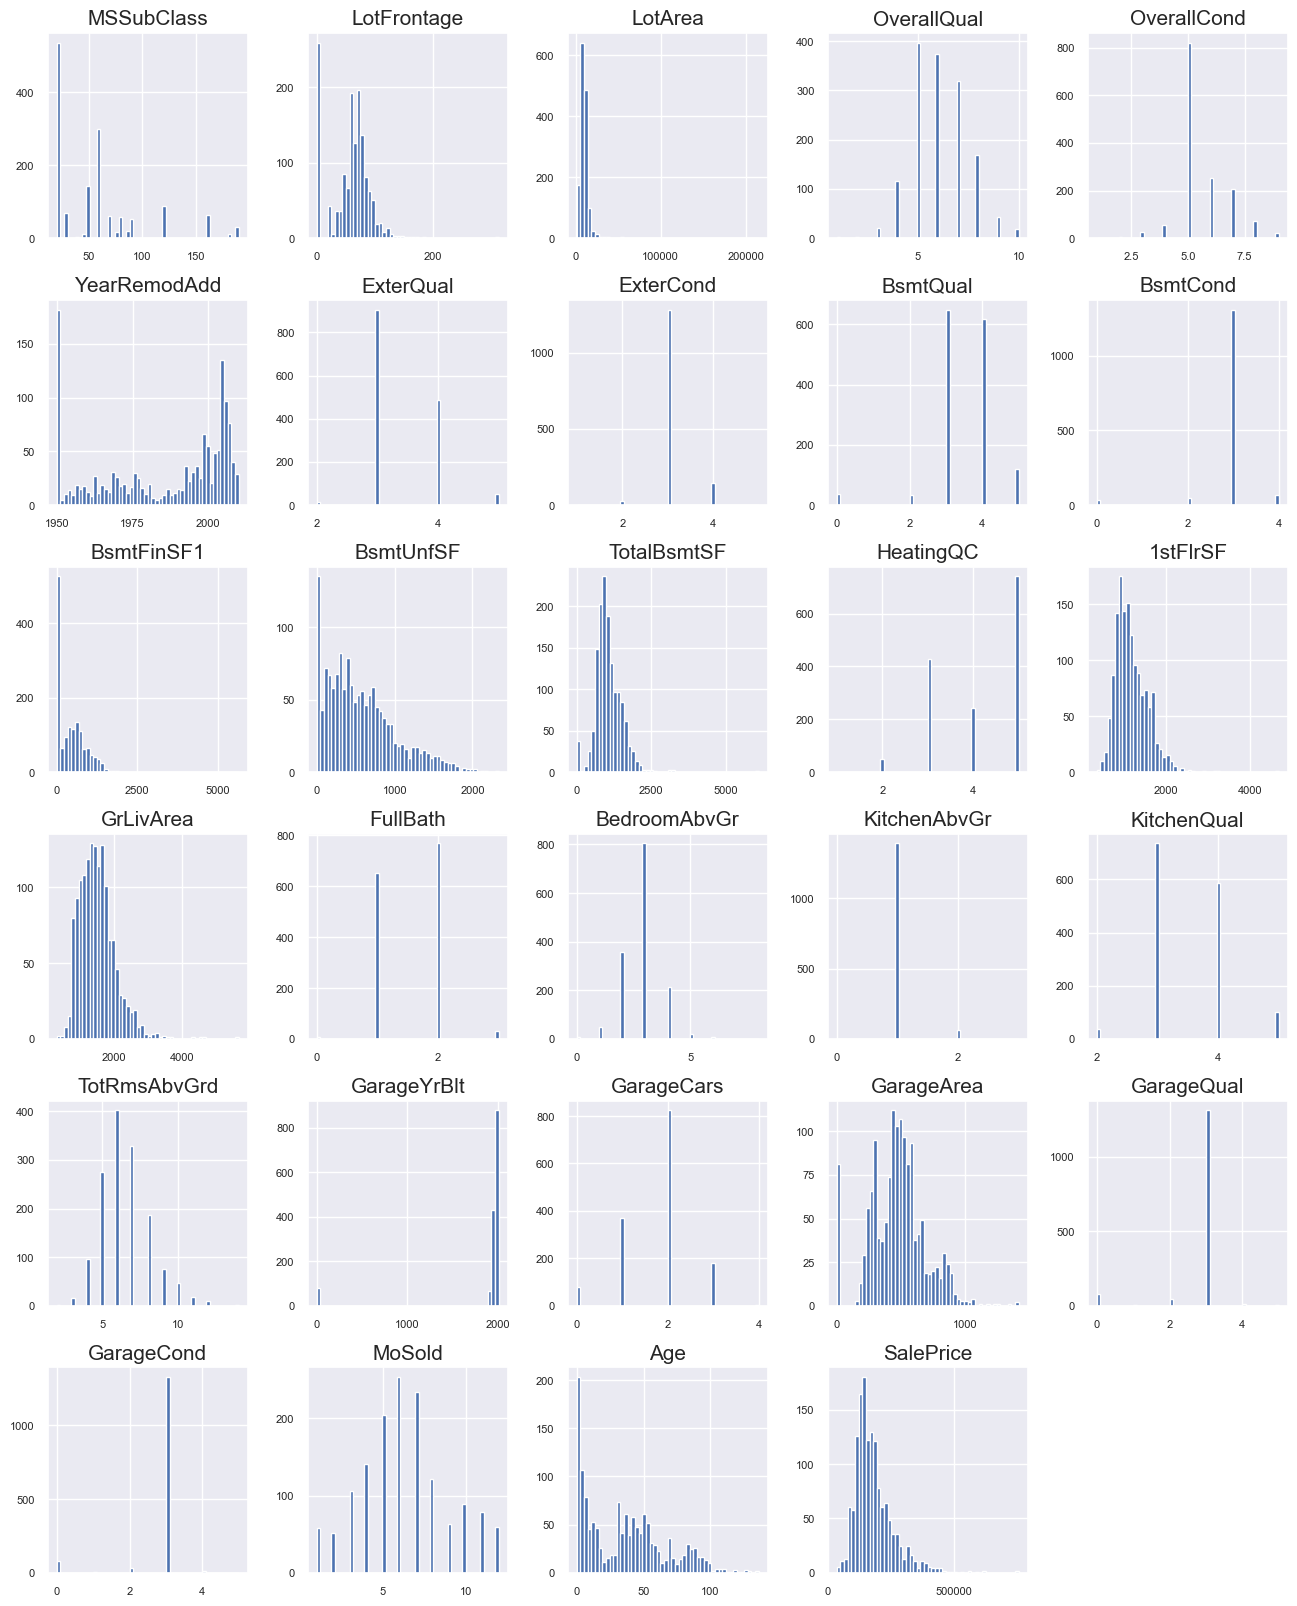

In [255]:
numerical_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

We can see that Garage Quality and condition have almost the same value, so we can drop both of them. Also the Garage Yearbuilt shows that most of<br>
the garages have been built in the same year, therefore we can drop it too.

In [256]:
column_to_delete = ['GarageQual', 'GarageCond', 'GarageYrBlt']
numerical_data = numerical_data.drop(column_to_delete, axis=1)



This plotting is quit helpful. Even though, there are no missing data in the colums, there are data having the same value in the same colum, so we will drop these as such LowQualFunSf

In [257]:
def drop_columns_with_zero_threshold(data, threshold):
    zero_counts = (data == 0).sum()
    columns_to_drop = zero_counts[zero_counts > threshold].index
    data = data.drop(columns=columns_to_drop)
    print(zero_counts)
    return data


threshold_0 = 200
numerical_data = drop_columns_with_zero_threshold(numerical_data, threshold_0)

MSSubClass        0
LotFrontage     259
LotArea           0
OverallQual       0
OverallCond       0
YearRemodAdd      0
ExterQual         0
ExterCond         0
BsmtQual         37
BsmtCond         37
BsmtFinSF1      467
BsmtUnfSF       118
TotalBsmtSF      37
HeatingQC         0
1stFlrSF          0
GrLivArea         0
FullBath          9
BedroomAbvGr      6
KitchenAbvGr      1
KitchenQual       0
TotRmsAbvGrd      0
GarageCars       81
GarageArea       81
MoSold            0
Age              64
SalePrice         0
dtype: int64


Now let's plot again the remaining useful colums of our numerical dataset

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>],
       [<AxesSubplot:title={'center':'ExterQual'}>,
        <AxesSubplot:title={'center':'ExterCond'}>,
        <AxesSubplot:title={'center':'BsmtQual'}>,
        <AxesSubplot:title={'center':'BsmtCond'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'HeatingQC'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'FullBath'}>],
       [<AxesSubplot:title={'center':'BedroomAbvGr'}>,
        <AxesSubplot:title={'center':'KitchenAbvGr'}>,
        <AxesSubplot:title={'center':'KitchenQual'}>,
        <AxesSubplot:title={'center':'TotRmsAbvGr

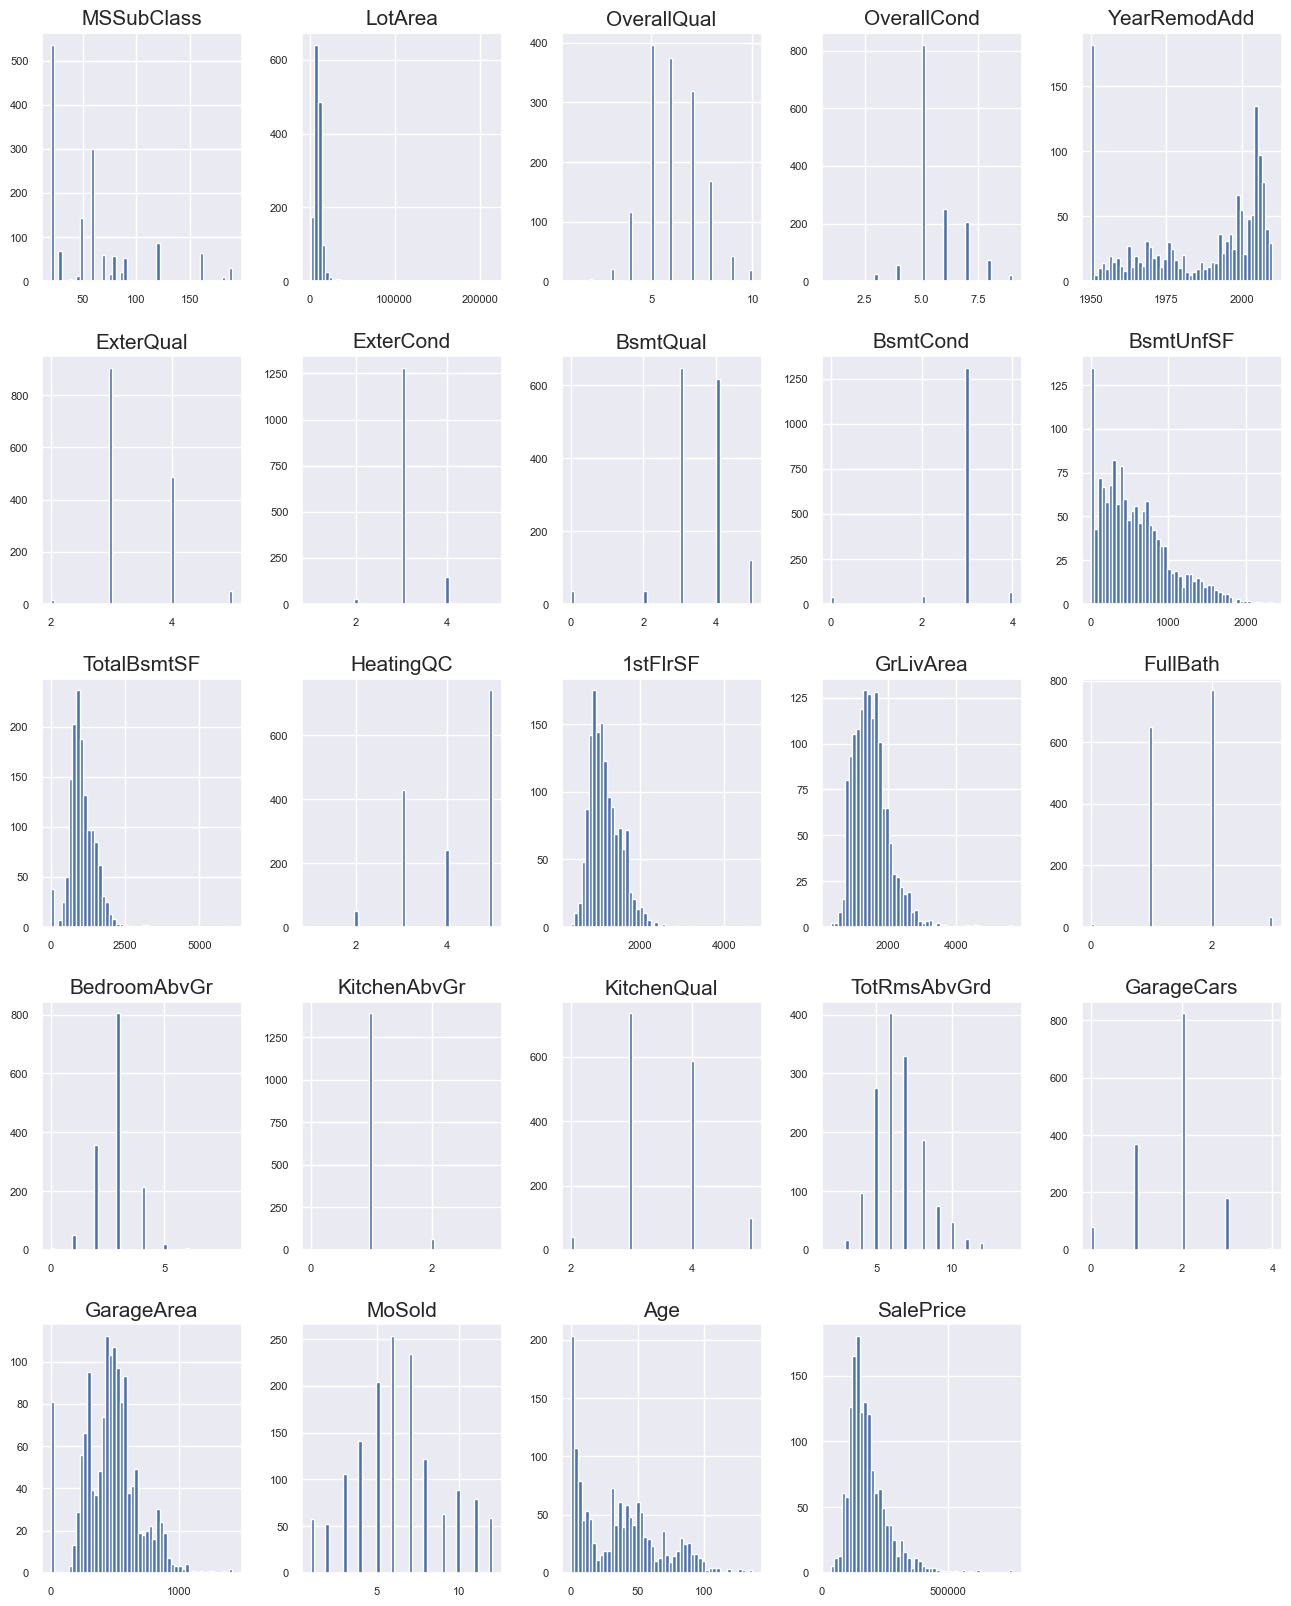

In [258]:
numerical_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

The plots looks better, but we can make it better by using logarithmic function

In [259]:
def apply_1_plus_log_transformation(data, columns_to_transform):
    transformed_data = data.copy()
    for column in columns_to_transform:
        transformed_data[column] = np.log1p(transformed_data[column])
    return transformed_data


columns_to_transform = ['1stFlrSF', 'GrLivArea', 'LotArea', 'SalePrice']
transformed_data = apply_1_plus_log_transformation(numerical_data, columns_to_transform)

In [260]:
transformed_data.head(5)

,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtUnfSF,...,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,GarageCars,GarageArea,MoSold,Age,SalePrice
0,60,9.042040,7,5,2003,4,3,4.0,3.0,150,...,2,3,1,4,8,2,548,2,5,12.247699
1,20,9.169623,6,8,1976,3,3,4.0,3.0,284,...,2,3,1,3,6,2,460,5,31,12.109016
2,60,9.328212,7,5,2002,4,3,4.0,3.0,434,...,2,3,1,4,6,2,608,9,7,12.317171
3,70,9.164401,7,5,1970,3,3,3.0,4.0,540,...,1,3,1,4,7,3,642,2,91,11.849405
4,60,9.565284,8,5,2000,4,3,4.0,3.0,490,...,2,4,1,4,9,3,836,12,8,12.429220


Let's plot again the result after the logarithmic transformation

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>],
       [<AxesSubplot:title={'center':'ExterQual'}>,
        <AxesSubplot:title={'center':'ExterCond'}>,
        <AxesSubplot:title={'center':'BsmtQual'}>,
        <AxesSubplot:title={'center':'BsmtCond'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'HeatingQC'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'FullBath'}>],
       [<AxesSubplot:title={'center':'BedroomAbvGr'}>,
        <AxesSubplot:title={'center':'KitchenAbvGr'}>,
        <AxesSubplot:title={'center':'KitchenQual'}>,
        <AxesSubplot:title={'center':'TotRmsAbvGr

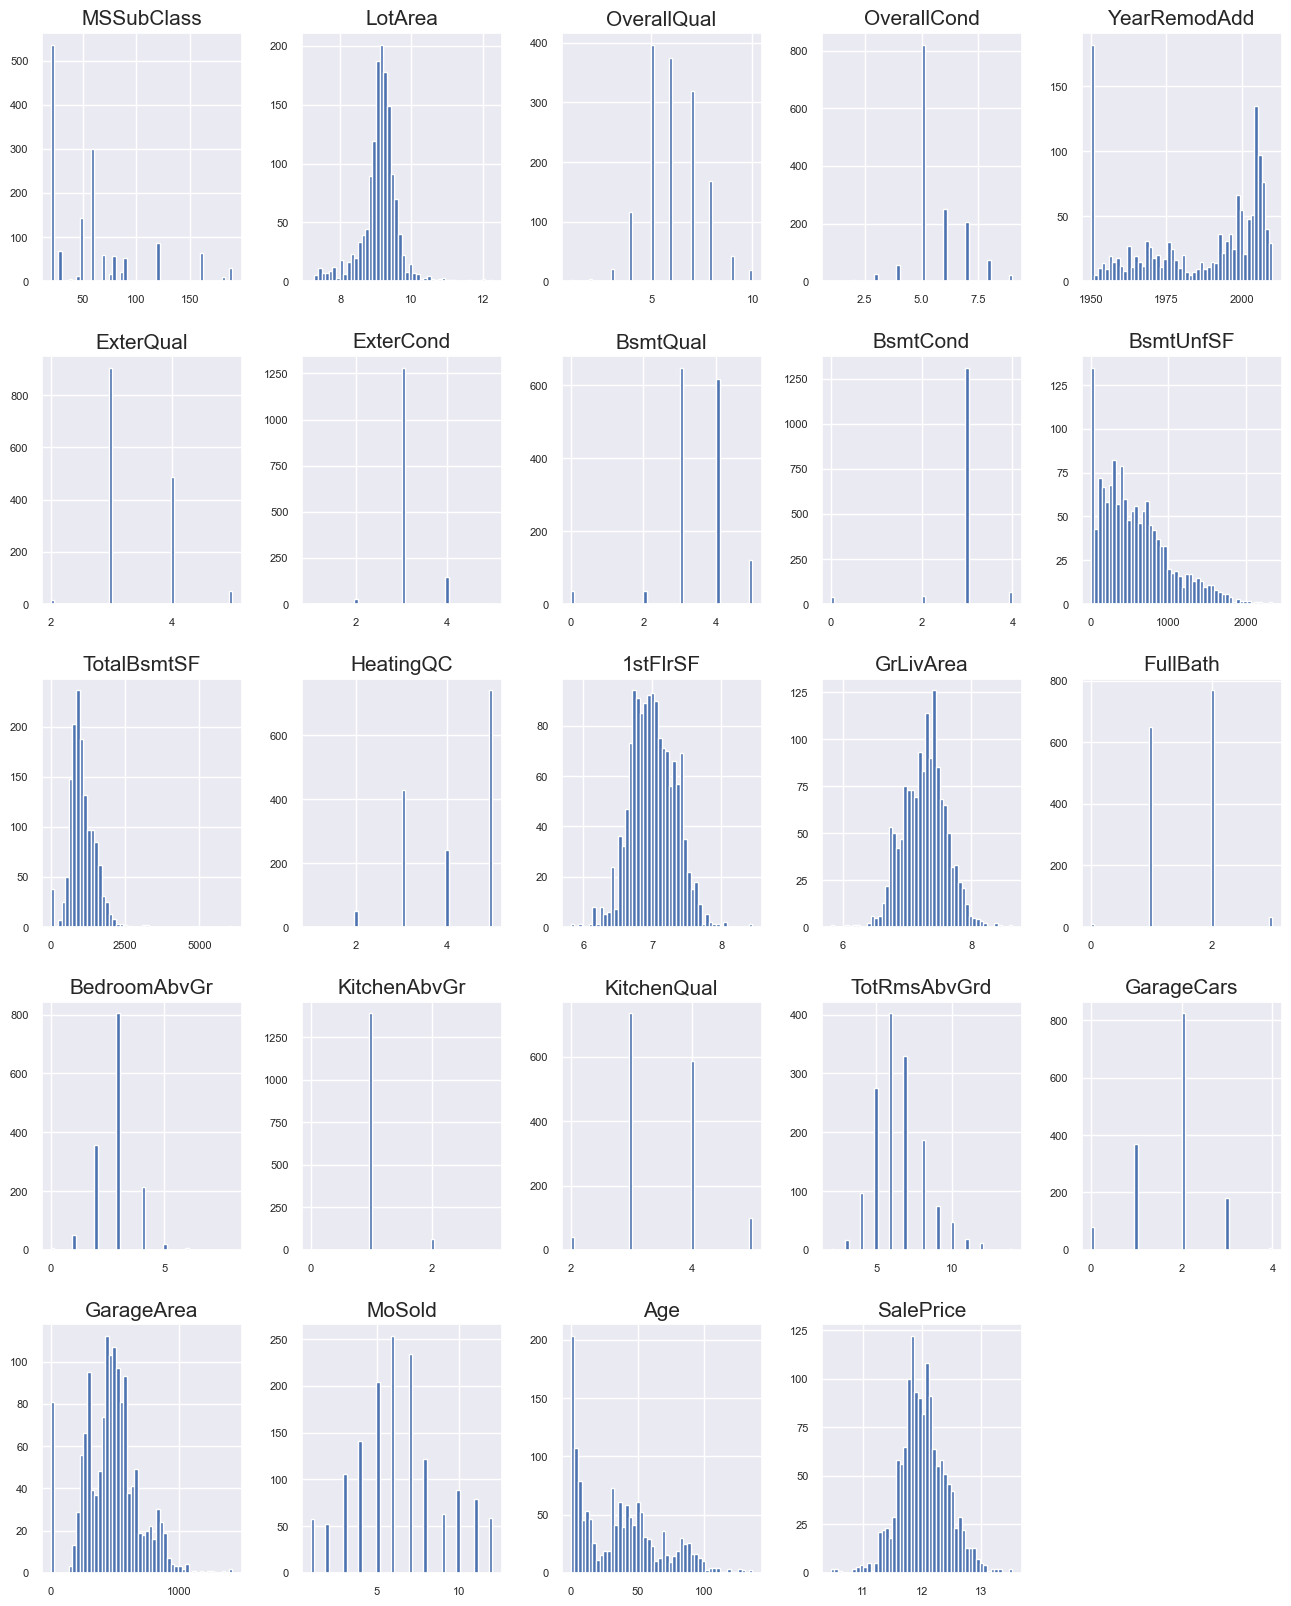

In [261]:
transformed_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

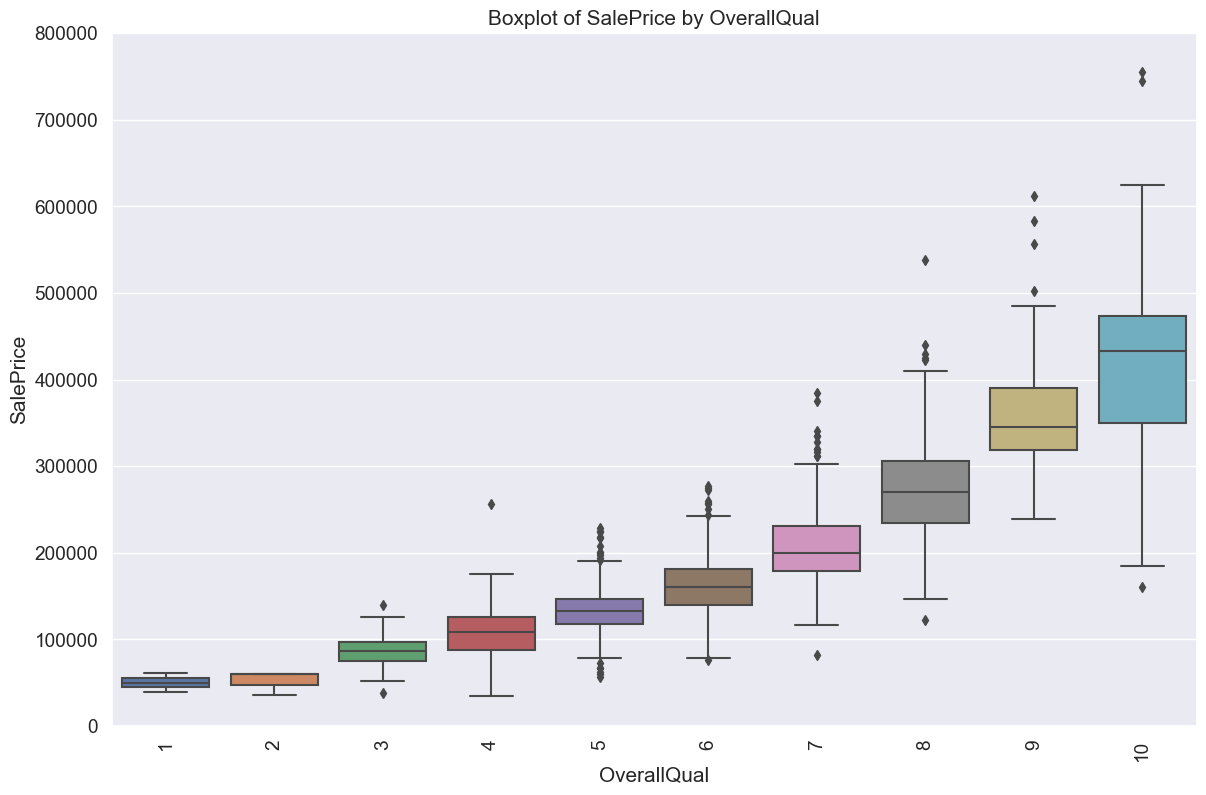

In [262]:
def plot_boxplot(df, x_column, y_column):
    data = df[[x_column, y_column]]
    fig, ax = plt.subplots(figsize=(14, 9))
    sns.boxplot(x=x_column, y=y_column, data=data, ax=ax)
    ax.set_ylim(0, 800000)
    plt.xticks(rotation=90)
    plt.title(f'Boxplot of {y_column} by {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()


plot_boxplot(numerical_data,'OverallQual', 'SalePrice')

 Box plots represent the spread of sale prices stratified by the overall quality of the properties. It is evident that higher-quality properties are yielding significantly higher sale prices. Specifically, the median sale price of properties with an overall quality rating of 10 is more than twice that of properties with a rating of 5. The median sale price of the property with a rating of 10 is 400,000,whereas the property with a rating of 5 is yielding something towards 150,000. From this, we can conclude that the overall quality of the property plays an important role in decision making and mathematical modeling.

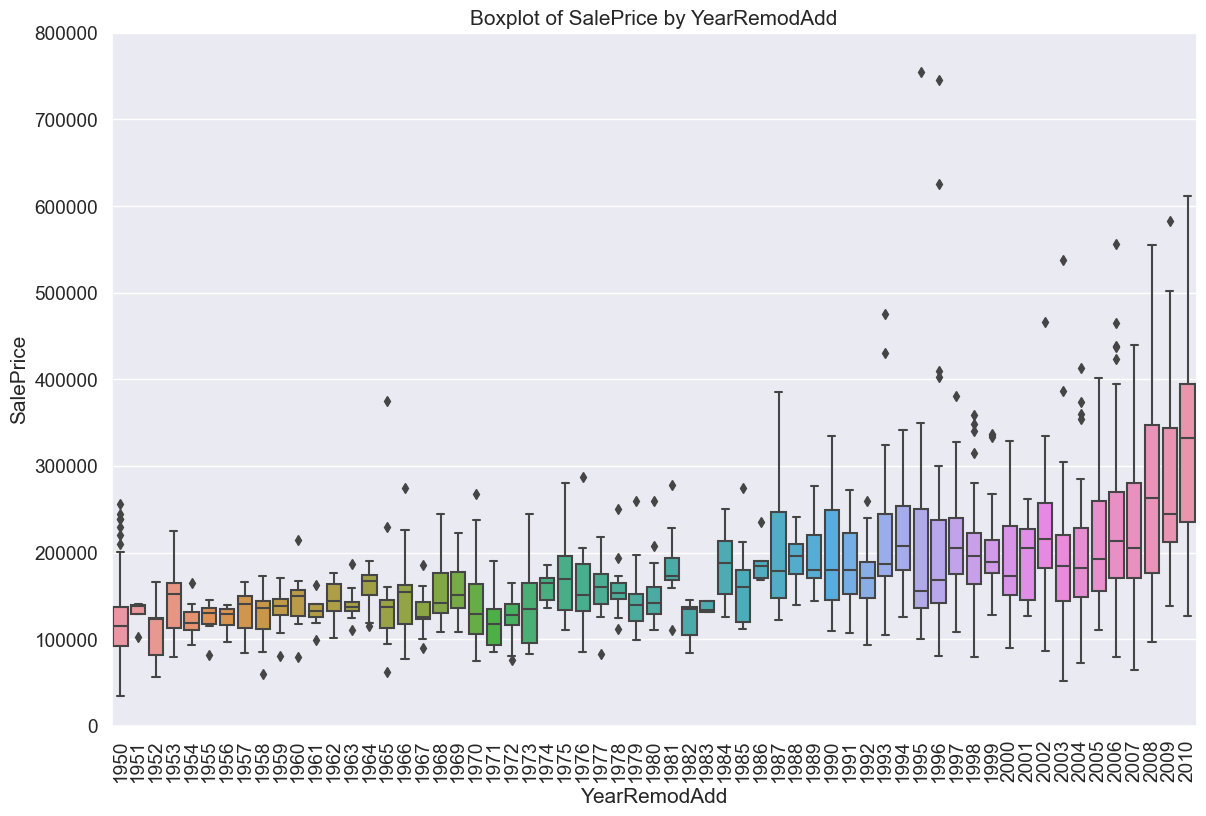

In [263]:
plot_boxplot(numerical_data,'YearRemodAdd', 'SalePrice')

Box plots represent the spread of sale prices stratified by the remodeling year of the properties. It is evident that recently remodeled properties are yielding significantly higher sale prices. Specifically, the median sale price of properties remodeled in year 2020 is almost as twice that of properties remodeled a decade ago in 2010. The median sale price of the property remodeled in 2020 300,000,whereas the median sale price of the property remodeled in 2010 is 150,000.

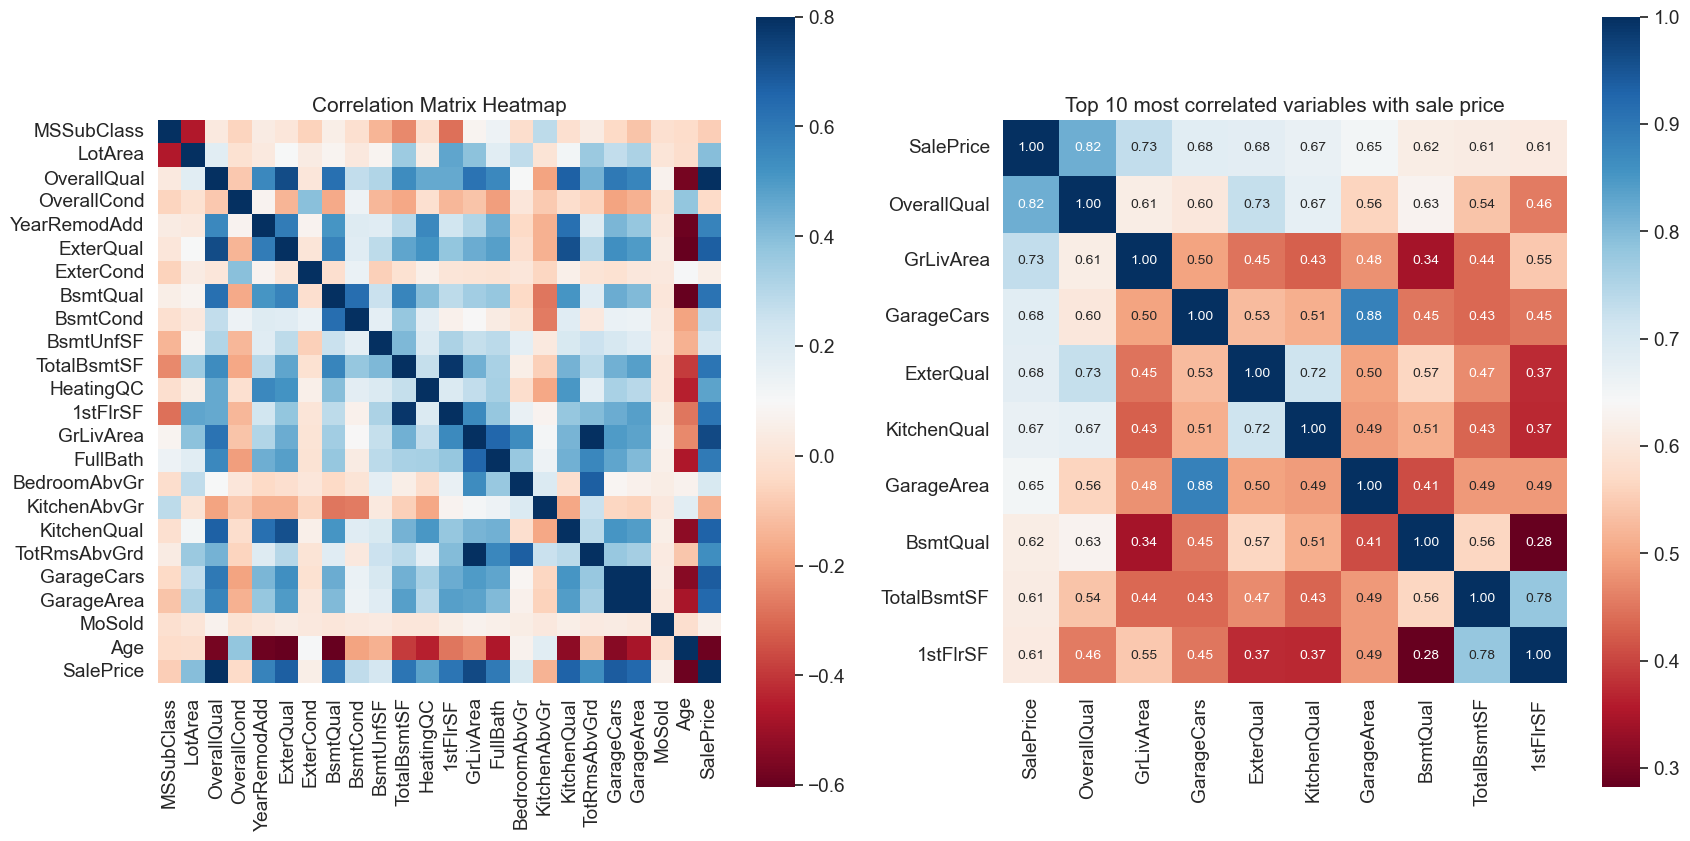

In [264]:
def plot_heatmaps(df):
    corrmat = df.corr()
    f, ax = plt.subplots(1, 2, figsize=(20, 10))
    sns.heatmap(corrmat, vmax=0.8, square=True, cmap="RdBu", ax=ax[0])
    ax[0].set_title('Correlation Matrix Heatmap')
    k = 10
    cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
    cm = np.corrcoef(df[cols].values.T)
    sns.set(font_scale=1.25)
    sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                yticklabels=cols.values, xticklabels=cols.values, cmap="RdBu", ax=ax[1])
    ax[1].set_title('Top 10 most correlated variables with sale price')
    plt.show()


plot_heatmaps(transformed_data)

The two plots show correlation heatmaps. The first one displays the correlation among all the variables, while the second one focuses on the top 10 variables with the highest correlation to SalePrice. From the first plot, we can observe some obvious correlations, such as ExternalQuality being positively correlated with OverAllQuality and Age being negatively correlated with OverAllQuality.An interesting observation is that among the top 10 highly correlated variables, all of them either represent the quality or the area of something. Notably, OverAllQuality occupies the number one spot, followed by the living area. In more general terms, it can be concluded that the quality and area of the property are the most important influencers of the sale price.

### Machine Learning - Regression Models


In the next step, we will divide our dataset into two parts: X and y. This separation will enable us to utilize various machine learning models effectively. Once the data is prepared, we will proceed to train each model using the different algorithms listed below. The main objective is to assess and compare the performance of these models to identify which one yields the best results.

The models we will be training are as follows:

1. Multiple Linear Regression
2. Random Forest
3. LightGBM

In [265]:
def model_evaluation(name, model, data):
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = model()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics_dict = {
        'Model': name,
        'MSE': mse,
        'R2-Score': r2
    }
    return metrics_dict


name = ['Multiple Linear Regression', 'Random Forest', 'LGBM']
models = [LinearRegression, RandomForestRegressor, LGBMRegressor]
metrics_list = []
for i, model in zip(name, models):
    metrics = model_evaluation(i, model, transformed_data)
    metrics_list.append(metrics)
metrics_df = pd.DataFrame(metrics_list)
print(metrics_df)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1799
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 23
[LightGBM] [Info] Start training from score 12.030658
                        Model       MSE  R2-Score
0  Multiple Linear Regression  0.020133  0.892113
1               Random Forest  0.022647  0.878642
2                        LGBM  0.022731  0.878189


We can from the above 3 models, Multiple Linear Regression performs better of all with regards to Mean Sqaure Error and R-Sqaured Score.

### References



1. Kaggle House Prices: Advanced Regression Techniques Competition. Retrieved from: [https://www.kaggle.com/c/house-prices-advanced-regression-techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

2. Pandas: Python Data Analysis Library. Retrieved from: [https://pandas.pydata.org](https://pandas.pydata.org)

3. Matplotlib: Visualization with Python. Retrieved from: [https://matplotlib.org](https://matplotlib.org)

4. Seaborn: Statistical Data Visualization. Retrieved from: [https://seaborn.pydata.org](https://seaborn.pydata.org)

5. Math module (Python Standard Library). Retrieved from: [https://docs.python.org/3/library/math.html](https://docs.python.org/3/library/math.html)

6. Statistics module (Python Standard Library). Retrieved from: [https://docs.python.org/3/library/statistics.html](https://docs.python.org/3/library/statistics.html)

7. Scikit-learn: Machine Learning in Python. Retrieved from: [https://scikit-learn.org](https://scikit-learn.org)

8. SciPy: Scientific Computing with Python. Retrieved from: [https://www.scipy.org](https://www.scipy.org)